In [1]:
import os, json

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
path = "data/data_robustness/"

data = []
json_files = [pos_json for pos_json in os.listdir(path) if pos_json.endswith('.json')]

### Parse the data
for index, js in enumerate(json_files):
    with open(os.path.join(path, js)) as json_file:
        data.append(json.load(json_file))
       
    
for item in data:
    if item['maximum length of sequences'] == 2 and item['num of outcomes'] == 2:
        for ind,val in enumerate(item['visibilities']):
            if val>1:
                item['visibilities'][ind]=1

# m-2-2

In [3]:
vis_mean = {}
vis_probout = {}

for item in data:
    if item['maximum length of sequences'] == 2 and item['num of outcomes'] == 2 and item['level'] == 1:
        vis_mean[str(item['num of observables'])] = sum(item['visibilities'])/len(item["visibilities"])
        vis_probout[str(item['num of observables'])] = len([v for v in item['visibilities'] if v < 0.999999])/len(item['visibilities'])
        print(item['num of observables'], vis_mean[str(item['num of observables'])], vis_probout[str(item['num of observables'])] )
        

4 0.9677760922199664 0.80692
6 0.9174847851668819 0.995
8 0.8803122990206291 1.0
3 0.9899762147872819 0.3878
7 0.8971620480293445 1.0
5 0.9414326010547086 0.96842


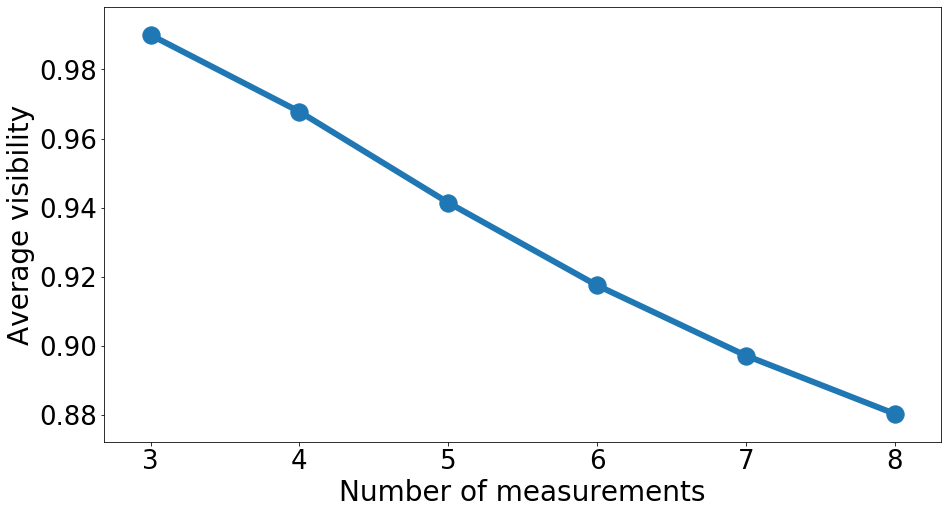

In [4]:
vis_avg = [x for _,x in sorted(zip(list(vis_mean.keys()),list(vis_mean.values())))]

fig = plt.figure(figsize=(15, 8))

plt.plot(range(3,len(vis_avg)+3), vis_avg, linewidth = 6, zorder=1)
plt.scatter(range(3,len(vis_avg)+3), vis_avg, s = 300, zorder=2)

plt.xlabel('Number of measurements', fontsize=28)
plt.ylabel('Average visibility', fontsize=28)
plt.tick_params(axis='both', labelsize=26)
plt.show()

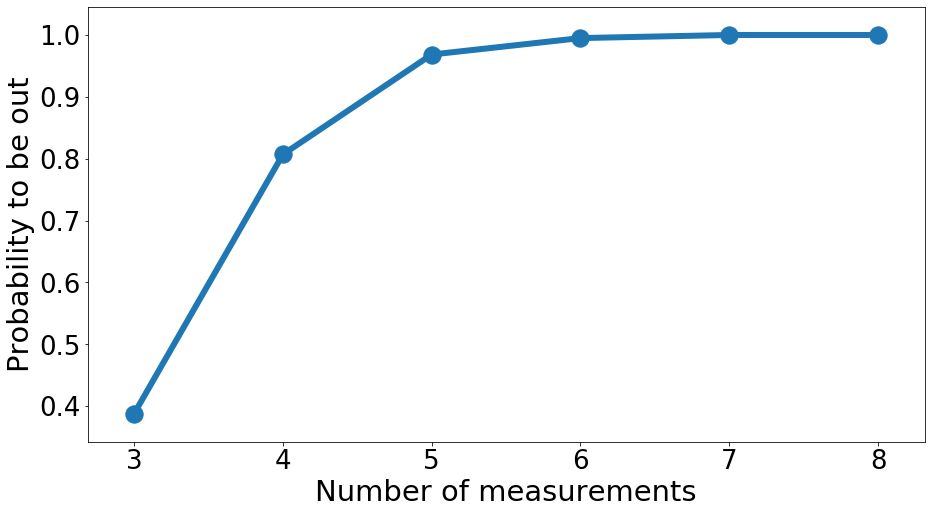

In [5]:
vis_probout = [x for _,x in sorted(zip(list(vis_probout.keys()),list(vis_probout.values())))]

fig = plt.figure(figsize=(15, 8))

plt.plot(range(3,len(vis_probout)+3), vis_probout, linewidth = 6, zorder=1)
plt.scatter(range(3,len(vis_probout)+3), vis_probout, s = 300, zorder=2)

plt.xlabel('Number of measurements', fontsize=29)
plt.ylabel('Probability to be out', fontsize=29)
plt.tick_params(axis='both', labelsize=26)
plt.show()

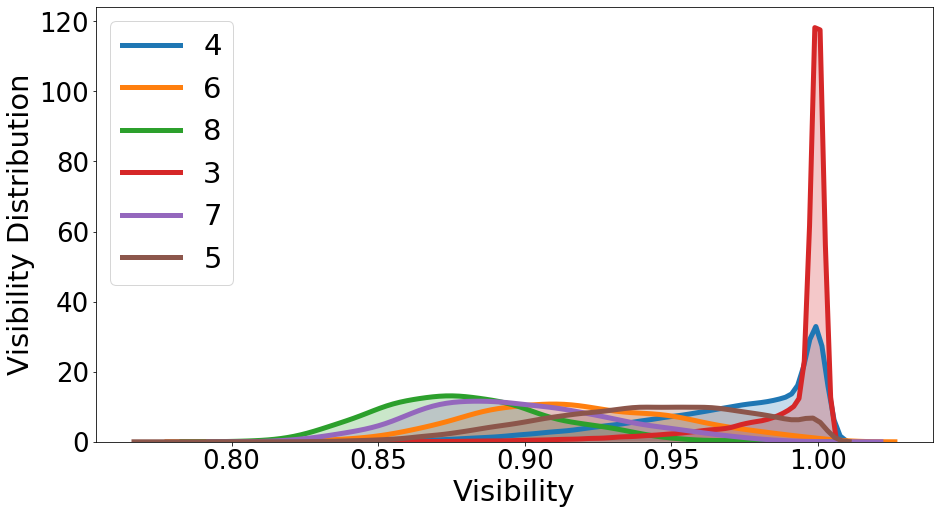

In [6]:
plt.figure(figsize=(15,8))

for item in data:
    if item['maximum length of sequences'] == 2 and item['num of outcomes'] == 2 and item['level'] == 1:
        ax = sns.distplot(item['visibilities'], hist = False, kde = True,
                         kde_kws = {'shade': True, 'linewidth': 5},
                          label = item['num of observables'])

ax.set_xlabel('Visibility', fontsize = 29)
ax.set_ylabel('Visibility Distribution', fontsize = 29)

ax.legend(fontsize = 29)

plt.tick_params(axis='both', labelsize=26)

# 3-k-2

In [7]:
vis_mean = {}
vis_probout = {}

for item in data:
    if item['maximum length of sequences'] == 2 and item['num of outcomes'] == 2 and item['level'] == 2:
        vis_mean[str(item['num of observables'])] = sum(item['visibilities'])/len(item["visibilities"])
        vis_probout[str(item['num of observables'])] = len([v for v in item['visibilities'] if v < 0.999999])/len(item['visibilities'])
        print(item['num of observables'], vis_mean[str(item['num of observables'])], vis_probout[str(item['num of observables'])] )
        

3 0.9891232009803493 0.413
2 0.9999999859915851 0.0
4 0.741960991530133 0.99


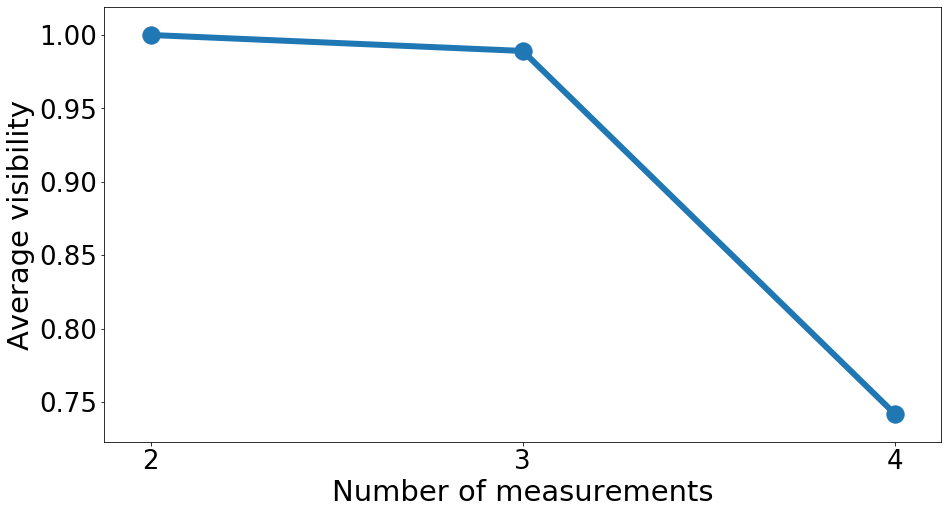

In [8]:
vis_avg = [x for _,x in sorted(zip(list(vis_mean.keys()),list(vis_mean.values())))]

fig = plt.figure(figsize=(15, 8))

plt.plot(range(2,len(vis_avg)+2), vis_avg, linewidth = 6, zorder=1)
plt.scatter(range(2,len(vis_avg)+2), vis_avg, s=300, zorder=2)

plt.xlabel('Number of measurements', fontsize=29)
plt.ylabel('Average visibility', fontsize=29)
plt.tick_params(axis='both', labelsize=26)
plt.xticks(range(2,len(vis_avg)+2))
plt.show()

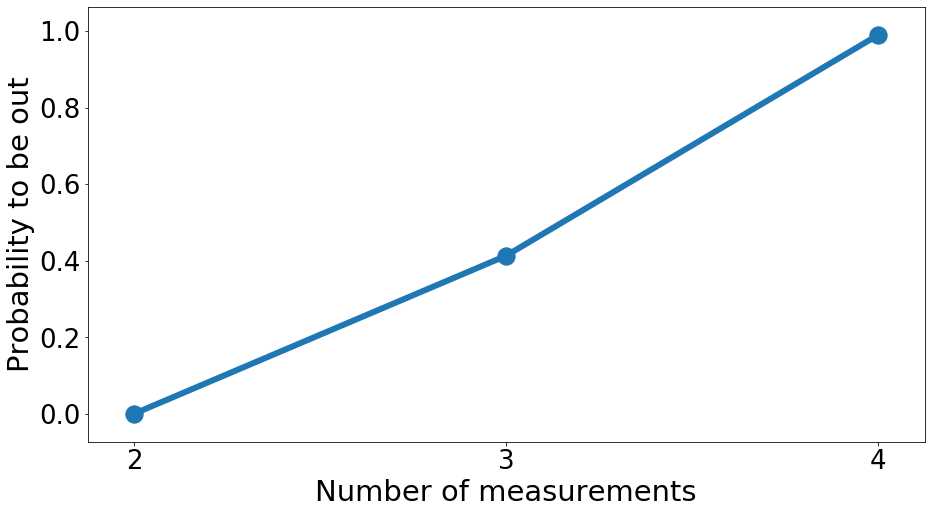

In [9]:
vis_probout = [x for _,x in sorted(zip(list(vis_probout.keys()),list(vis_probout.values())))]

fig = plt.figure(figsize=(15, 8))

plt.plot(range(2,len(vis_probout)+2), vis_probout, linewidth = 6, zorder=1)
plt.scatter(range(2,len(vis_probout)+2), vis_probout, s=300, zorder=2)

plt.xlabel('Number of measurements', fontsize=29)
plt.ylabel('Probability to be out', fontsize=29)
plt.tick_params(axis='both', labelsize=26)
plt.xticks(range(2,len(vis_avg)+2))
plt.show()

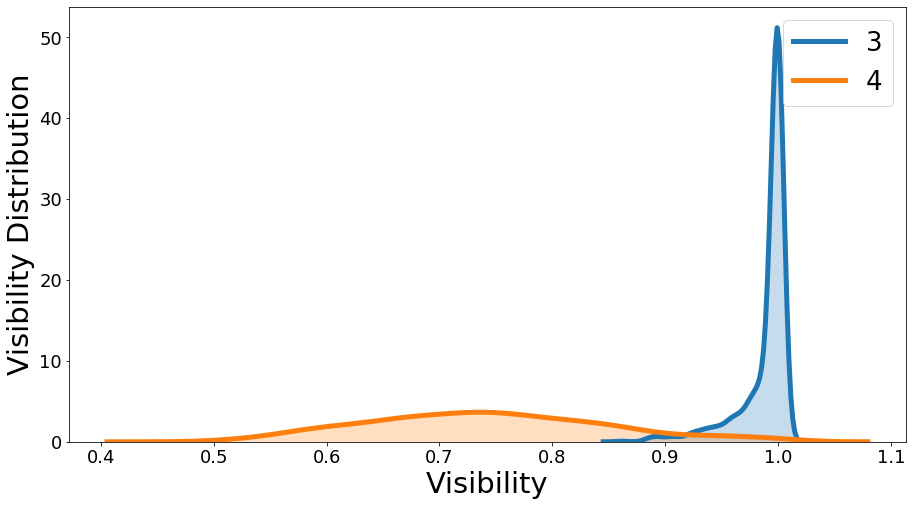

In [10]:
plt.figure(figsize=(15,8))

for item in data:
    if item['maximum length of sequences'] == 2 and item['num of outcomes'] == 2 and item['level'] == 2 and item['num of observables'] != 2:
        ax = sns.distplot(item['visibilities'], hist = False, kde = True,
                         kde_kws = {'shade': True, 'linewidth': 5},
                          label = item['num of observables'])

ax.set_xlabel('Visibility', fontsize = 29)
ax.set_ylabel('Visibility Distribution', fontsize = 29)

ax.legend(fontsize = 26)

plt.tick_params(axis='both', labelsize=18)